In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [2]:
settings_path = 'settings/sam_summer_30d.yaml'
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)

lm = gr.get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

nbpd_fig1 = 20
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec",nbpd = nbpd_fig1,  nd=5, overwrite = True, dist_mask = False)



Data loaded from /homedata/mcarenso/tempest/SAM_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/SAM_lowRes_Tropics/grid_attributes.pkl instead of computing
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Retrieve labels in jdist
Time elapsed for propagating all labels: 13.26 seconds


In [3]:
settings_path_obs = 'settings/obs_summer_30d.yaml'
hdlr_obs = handler.Handler(settings_path_obs)
cs_obs = casestudy.CaseStudy(hdlr_obs, overwrite = False ,verbose = False)
gr_obs = grid.Grid(cs_obs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st_obs = storm_tracker.StormTracker(gr_obs, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd_obs = joint_distrib.JointDistribution(gr_obs, st_obs, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec",nbpd = nbpd_fig1,  nd=5, overwrite = True, dist_mask = False)

Data loaded from /homedata/mcarenso/tempest/OBS_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBS_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Retrieve labels in jdist
Time elapsed for propagating all labels: 12.97 seconds


In [4]:
# %matplotlib inline
# from skimage import measure # pylance: disable=import-error 
# from tempest.plots.plot2d import set_frame_invlog, show_joint_histogram
# from matplotlib.font_manager import FontProperties

# model_name = str(jd.settings["MODEL"][:-7])
# fontsize = 18
# fontname = 'DejaVu Sans'
# fig, axs = plt.subplots(1, 3, figsize=(3*10, 8))

# #levels for density contour
# levels = [0, 25]
# _, cb0 = jd.plot_data_contour(data = jd.bincount, contour=jd.bincount, contour_2=jd_obs.bincount, levels = levels, scale = 'log', 
#                      label  = 'Bincount', title = model_name+' vs Obs',
#                      cmap=plt.cm.magma_r, fig = fig, ax = axs[0], cb_bool=True)
# axs[0].set_xlabel(r"1$^\circ\times 1$day", fontsize = fontsize,  fontname=fontname)
# axs[0].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
# axs[0].set_title(label = model_name+' vs Obs', fontsize = fontsize, fontname=fontname)
# axs[0].tick_params(axis='x', labelsize=fontsize)
# axs[0].tick_params(axis='y', labelsize=fontsize) 
# cb0.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb0.set_label('Bincount', fontsize=fontsize)  # Adjust font size of the colorbar label
# axs[0].text(0.01, 1.04, "c)", transform=axs[0].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')


# _,cb1,ax_show_1 = jd.plot(mask = False, branch=[True, True] , fig = fig, ax = axs[1], N_branch=60, title = model_name+" normalized density", offset_low = 1, offset_up=1)
# axs[1].set_xlabel(r"1$^\circ\times 1$day",  fontsize = fontsize, fontname=fontname)
# axs[1].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
# axs[1].set_title(label = model_name+" normalized density", fontsize = fontsize, fontname=fontname)
# axs[1].tick_params(axis='x', labelsize=fontsize)
# axs[1].tick_params(axis='y', labelsize=fontsize) 
# cb1.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb1.set_label('Normalized density', fontsize=fontsize)  # Adjust font size of the colorbar label
# axs[1].text(0.01, 1.04, "d)", transform=axs[1].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')

# # jd.plot(mask = True, branch=[True, True], fig = fig, ax = axs[ 0], N_branch = 60, title = "Categories", offset_low = 1, offset_up=1) 
# # axs[0].set_xlabel(r"1$^\circ\times 1$day")
# # axs[0].set_ylabel(r"km-scale")


# models = ["ARPEGE", "FV3", "IFS", "MPAS", "NICAM", "Obs", "SAM", "SAM \n 4km x \n 30min", "UM"]
# I_001      = [0.434, 0.492, 0.392, 0.557, 0.442, 0.639, 0.535, 0.347, 0.338]
# I_015      = [0.406, 0.489, 0.371, 0.565, 0.414, 0.62 , 0.512, 0.343, 0.323]
# I_050      = [0.394, 0.504, 0.373, 0.585, 0.402, 0.613, 0.509, 0.373, 0.342]
# I_conv_001 = [0.462, 0.53 , 0.467, 0.583, 0.458, 0.539, 0.474, 0.463, 0.5  ]   
# I_conv_015 = [0.465, 0.518, 0.489, 0.418, 0.502, 0.469, 0.506, 0.508, 0.501]
# I_conv_050 = [0.379, 0.434, 0.426, 0.347, 0.5  , 0.392, 0.466, 0.423, 0.442]
# y_pos = np.arange(len(models))
# # Create horizontal bars
# # bars = ax.barh(y_pos, opt_alpha, xerr=np.array(ci).T, color='skyblue', ecolor='black', capsize=5)
# axs[2].scatter(I_001, y_pos, c = 'lightblue', label=r"$P;P_{0.01}$", marker = "x")
# axs[2].scatter(I_015, y_pos, c = 'mediumblue', label=r"$P;P_{0.15}$", marker = "x")
# axs[2].scatter(I_050, y_pos, c = 'midnightblue', label=r"$P;P_{0.50}$", marker = "x")


# axs[2].scatter(I_conv_001, y_pos, c = 'lightcoral', label=r"$P^{10};P_{0.01}$", marker = "s")
# axs[2].scatter(I_conv_015, y_pos, c = 'brown', label=r"$P^{10};P_{0.15}$", marker = "s")
# axs[2].scatter(I_conv_050, y_pos, c = 'maroon', label=r"$P^{10};P_{0.50}$", marker = "s")

# for i in range(len(models)):
#     axs[2].plot([np.min([I_001[i], I_015[i], I_050[i]]), np.max([I_001[i], I_015[i], I_050[i]])], [y_pos[i], y_pos[i]], color='blue', alpha = 0.4)
#     axs[2].plot([np.min([I_conv_001[i], I_conv_015[i], I_conv_050[i]]), np.max([I_conv_001[i], I_conv_015[i], I_conv_050[i]])], [y_pos[i], y_pos[i]], color='red', alpha = 0.4)


# # Label the y-axis with the model names
# axs[2].set_yticks(y_pos)
# axs[2].set_yticklabels(models, fontsize = fontsize, fontname=fontname)
# axs[2].invert_yaxis()  # labels read top-to-bottom
# # Label the x-axis
# axs[2].set_xlabel(r"$I_{99th}$ normalised", fontsize = fontsize, fontname=fontname)
# axs[2].tick_params(axis='x', labelsize=fontsize)
# # Legend
# font_prop = FontProperties(size=fontsize-2, style='italic')#, weight='bold')
# axs[2].legend(prop=font_prop)
# # Title
# axs[2].set_title(r"$I_{99th}$ of $P$ and $P^{10}$ for diverse $\alpha$ ", fontsize = fontsize, fontname=fontname)
# axs[2].text(0.01, 1.04, "c)", transform=axs[2].transAxes, fontsize=fontsize-2, fontweight='bold', va='top') #fontweight='bold',


# # Annotations
# labels = ['Only \n km-scale', 'Mostly \n km-scale', 'Mostly \n 1°x1day', 'Only \n 1°x1day']
# # Colors sampled from viridis
# values = np.array([1, 2, 3, 4])
# cmap = mpl.cm.viridis
# norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)
# colors = cmap(norm(values))[::-1]
# positions = [(12, 60), (35, 50), (50, 30), (55, 10)]  # Adjust positions based on actual data or layout considerations

# for label, color, position in zip(labels, colors, positions):
#     text = ax_show_1.text(position[0], position[1], label, fontsize=18, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7))
#     # text.set_clip_on(False)
#     text.set_zorder(2)
#     # text.set_in_layout(True)
#     # axs[1].annotate(label, position, fontsize=16, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7), zorder=1e5)

# plt.tight_layout()
# plt.savefig('figures/fig1.png', dpi=300)  # Saves the plot with 300 dpi

contour shapes :  (101, 101) (101, 101)


/home/mcarenso/code/tempest/tempest/joint_distrib.py:439: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:439: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


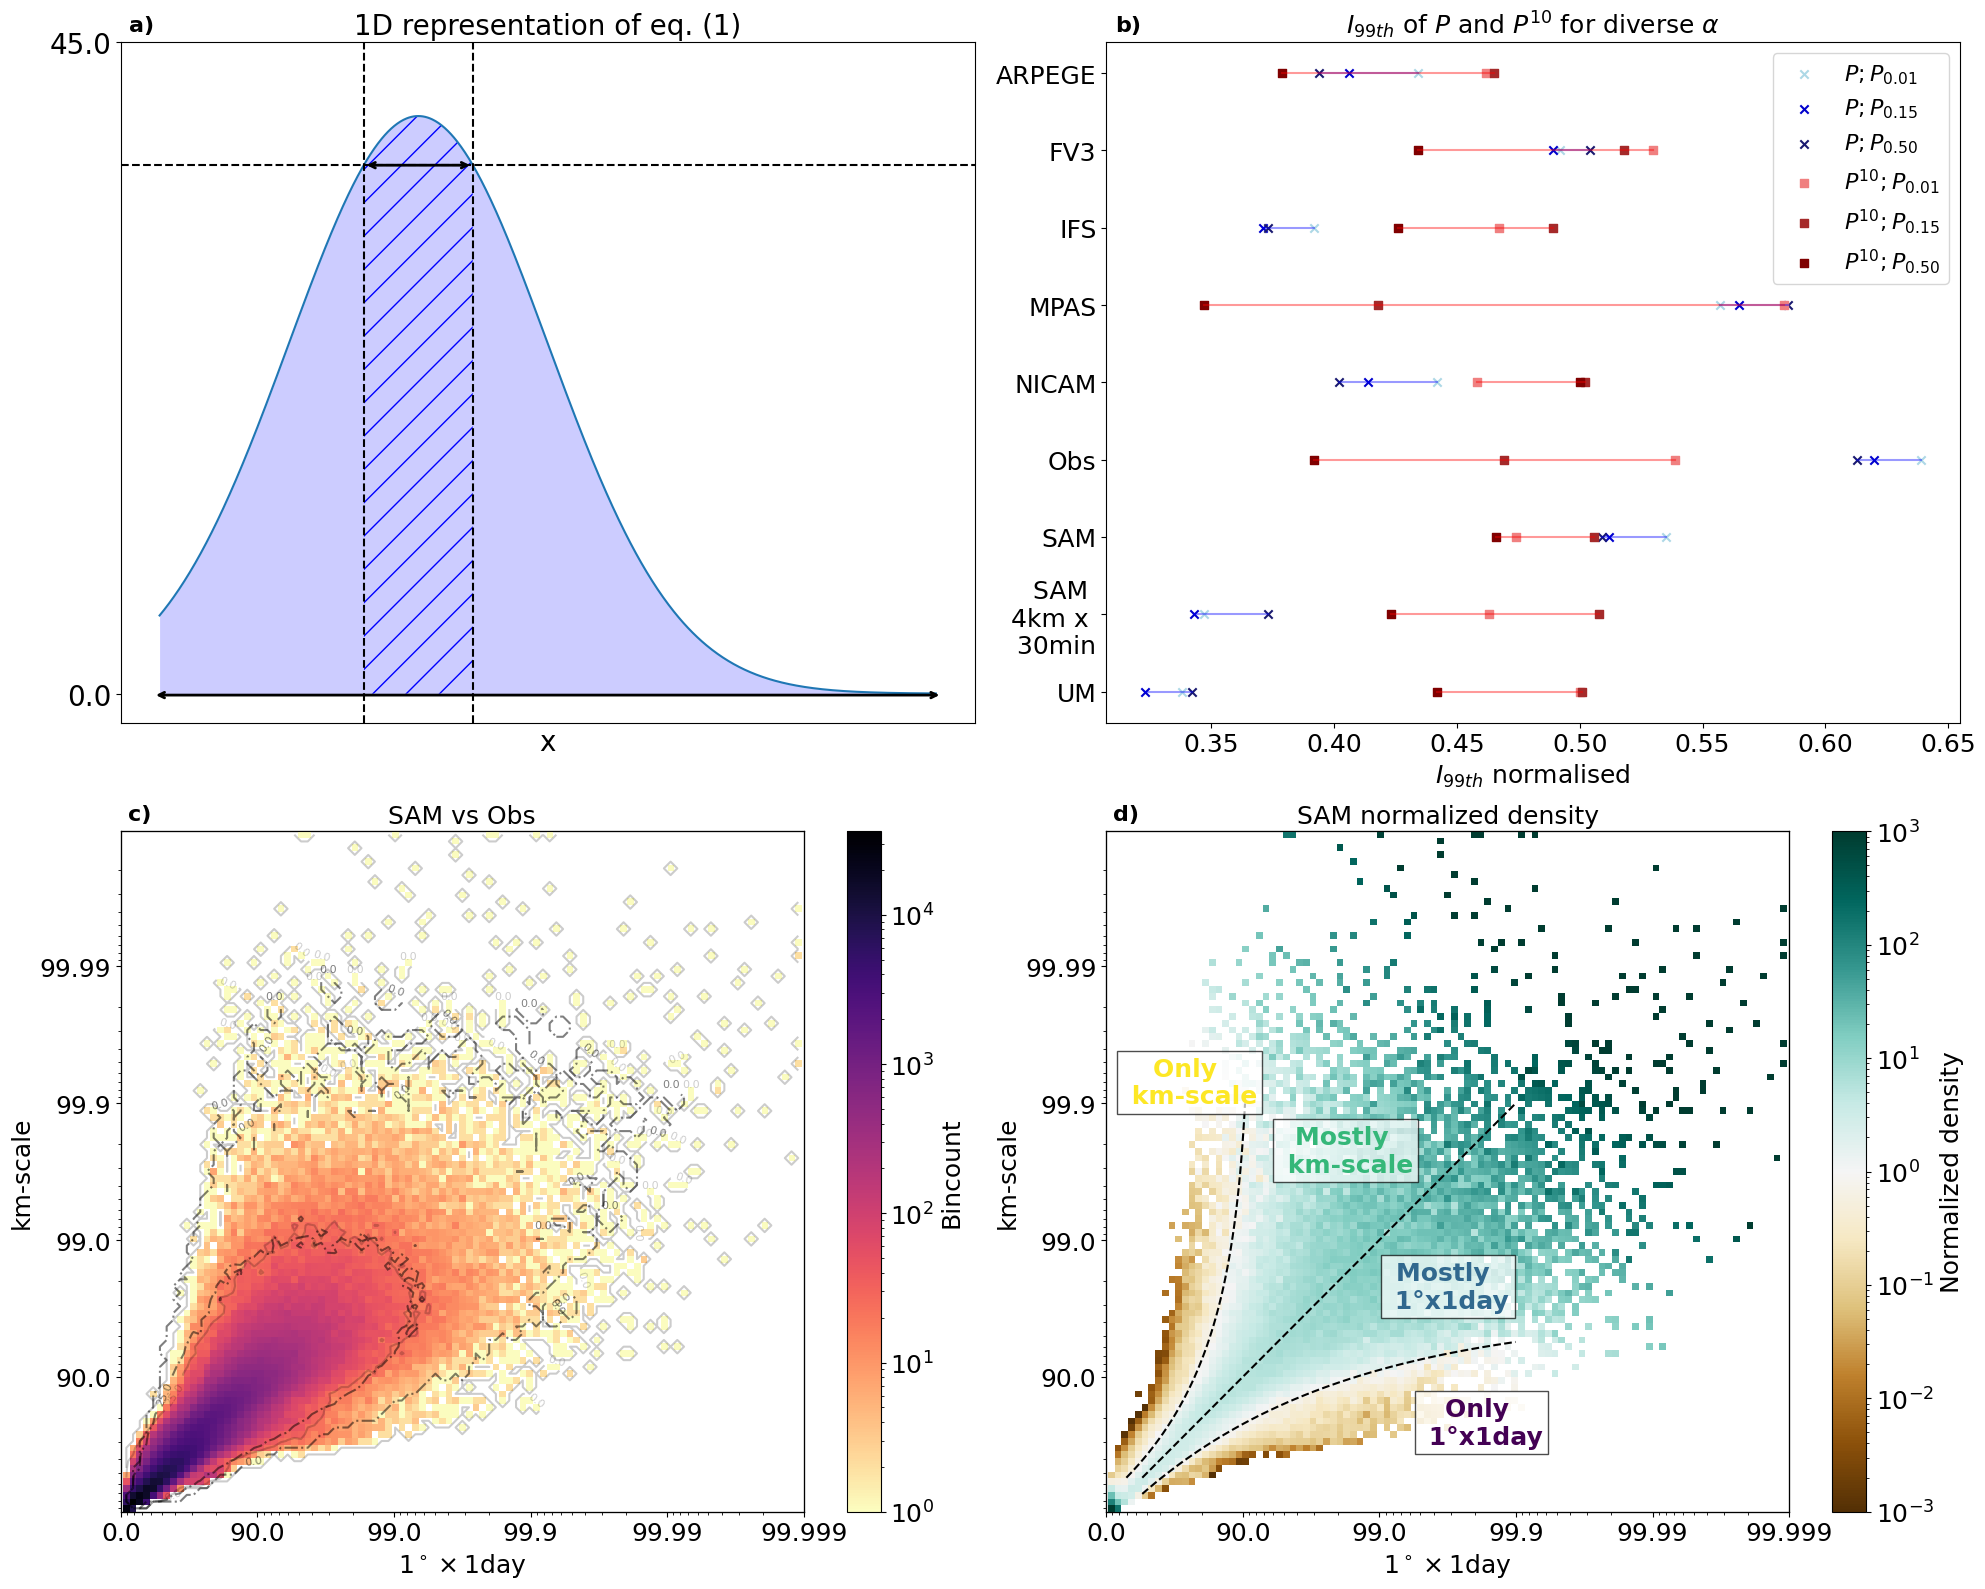

In [6]:
%matplotlib inline
from skimage import measure # pylance: disable=import-error 
from tempest.plots.plot2d import set_frame_invlog, show_joint_histogram
from matplotlib.font_manager import FontProperties
import matplotlib.image as mpimg
from PIL import Image
from scipy.stats import norm

model_name = str(jd.settings["MODEL"][:-7])
fontsize = 18
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman'
# plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
# plt.rcParams['font.monospace'] = 'Computer Modern Typewriter'
# plt.rcParams['axes.unicode_minus'] = False
fontname = 'DejaVu Sans'
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.flatten()

# Define the Gaussian distribution parameters
mean = -2
std_dev = 1
threshold = 36.5

# Generate x values
x = np.linspace(-4, 2, 1000)

# Generate y values using the Gaussian (normal) distribution formula
y = 100*norm.pdf(x, mean, std_dev)

# Plot the Gaussian distribution
axs[0].plot(x, y, label='Gaussian Distribution')

# Highlight the portion of the distribution above the threshold
x_fill = x[y > threshold]
y_fill = y[y > threshold]
axs[0].fill_between(x_fill, y_fill, color='none', hatch='/', edgecolor='blue', linewidth=0)

# Highlight the portion of the distribution above the threshold
axs[0].fill_between(x, y, color='blue', alpha=0.2, edgecolor='k', linewidth=0)

# Add vertical lines for over threshold area
axs[0].axvline(x=x_fill[0], color='k', linestyle='--')
axs[0].axvline(x=x_fill[-1], color='k', linestyle='--')
axs[0].axhline(y=threshold, color='k', linestyle='--')

# Add double arrow representing S_alpha
axs[0].annotate('', xy=(x_fill[0], threshold), xytext=(x_fill[-1], threshold),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))

# Add double arrow representing S
axs[0].annotate('', xy=(x[0]-0.05, -0.1), xytext=(x[-1]+0.05, -0.1),
             arrowprops=dict(arrowstyle='<->', color='k', lw=2))

# Add labels and annotations
axs[0].set_title(r'1D representation of eq. (1)', fontsize = 20)
axs[0].set_xlabel('x', fontsize = 20)
# axs[0].ylabel('km-scale precipitation p (mm/h)', fontsize = 12)

# Customize tick labels
axs[0].set_xticks([])  # Remove all x-tick labels
y_ticks = axs[0].get_yticks()
axs[0].set_yticks([y_ticks[1], y_ticks[-1]], [f'{y_ticks[1]:.1f}', f'{y_ticks[-1]:.1f}'], fontsize = 20)

axs[0].text(0.01, 1.04, "a)", transform=axs[0].transAxes, fontsize=fontsize-2, fontweight='bold', va='top') #fontweight='bold',

#levels for density contour
levels = [0, 25]
_, cb0 = jd.plot_data_contour(data = jd.bincount, contour=jd.bincount, contour_2=jd_obs.bincount, levels = levels, scale = 'log', 
                     label  = 'Bincount', title = model_name+' vs Obs',
                     cmap=plt.cm.magma_r, fig = fig, ax = axs[2], cb_bool=True)
axs[2].set_xlabel(r"1$^\circ\times 1$day", fontsize = fontsize,  fontname=fontname)
axs[2].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
axs[2].set_title(label = model_name+' vs Obs', fontsize = fontsize, fontname=fontname)
axs[2].tick_params(axis='x', labelsize=fontsize)
axs[2].tick_params(axis='y', labelsize=fontsize) 
cb0.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
cb0.set_label('Bincount', fontsize=fontsize)  # Adjust font size of the colorbar label
axs[2].text(0.01, 1.04, "c)", transform=axs[2].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')


_,cb1,ax_show_1 = jd.plot(mask = False, branch=[True, True] , fig = fig, ax = axs[3], N_branch=60, title = model_name+" normalized density", offset_low = 1, offset_up=1)
axs[3].set_xlabel(r"1$^\circ\times 1$day",  fontsize = fontsize, fontname=fontname)
axs[3].set_ylabel(r"km-scale",  fontsize = fontsize, fontname=fontname)
axs[3].set_title(label = model_name+" normalized density", fontsize = fontsize, fontname=fontname)
axs[3].tick_params(axis='x', labelsize=fontsize)
axs[3].tick_params(axis='y', labelsize=fontsize) 
cb1.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
cb1.set_label('Normalized density', fontsize=fontsize)  # Adjust font size of the colorbar label
axs[3].text(0.01, 1.04, "d)", transform=axs[3].transAxes, fontsize=fontsize-2, fontweight='bold', va='top')

# jd.plot(mask = True, branch=[True, True], fig = fig, ax = axs[ 0], N_branch = 60, title = "Categories", offset_low = 1, offset_up=1) 
# axs[0].set_xlabel(r"1$^\circ\times 1$day")
# axs[0].set_ylabel(r"km-scale")


models = ["ARPEGE", "FV3", "IFS", "MPAS", "NICAM", "Obs", "SAM", "SAM \n 4km x \n 30min", "UM"]
I_001      = [0.434, 0.492, 0.392, 0.557, 0.442, 0.639, 0.535, 0.347, 0.338]
I_015      = [0.406, 0.489, 0.371, 0.565, 0.414, 0.62 , 0.512, 0.343, 0.323]
I_050      = [0.394, 0.504, 0.373, 0.585, 0.402, 0.613, 0.509, 0.373, 0.342]
I_conv_001 = [0.462, 0.53 , 0.467, 0.583, 0.458, 0.539, 0.474, 0.463, 0.5  ]   
I_conv_015 = [0.465, 0.518, 0.489, 0.418, 0.502, 0.469, 0.506, 0.508, 0.501]
I_conv_050 = [0.379, 0.434, 0.426, 0.347, 0.5  , 0.392, 0.466, 0.423, 0.442]
y_pos = np.arange(len(models))
# Create horizontal bars
# bars = ax.barh(y_pos, opt_alpha, xerr=np.array(ci).T, color='skyblue', ecolor='black', capsize=5)
axs[1].scatter(I_001, y_pos, c = 'lightblue', label=r"$P;P_{0.01}$", marker = "x")
axs[1].scatter(I_015, y_pos, c = 'mediumblue', label=r"$P;P_{0.15}$", marker = "x")
axs[1].scatter(I_050, y_pos, c = 'midnightblue', label=r"$P;P_{0.50}$", marker = "x")


axs[1].scatter(I_conv_001, y_pos, c = 'lightcoral', label=r"$P^{10};P_{0.01}$", marker = "s")
axs[1].scatter(I_conv_015, y_pos, c = 'brown', label=r"$P^{10};P_{0.15}$", marker = "s")
axs[1].scatter(I_conv_050, y_pos, c = 'maroon', label=r"$P^{10};P_{0.50}$", marker = "s")

for i in range(len(models)):
    axs[1].plot([np.min([I_001[i], I_015[i], I_050[i]]), np.max([I_001[i], I_015[i], I_050[i]])], [y_pos[i], y_pos[i]], color='blue', alpha = 0.4)
    axs[1].plot([np.min([I_conv_001[i], I_conv_015[i], I_conv_050[i]]), np.max([I_conv_001[i], I_conv_015[i], I_conv_050[i]])], [y_pos[i], y_pos[i]], color='red', alpha = 0.4)


# Label the y-axis with the model names
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(models, fontsize = fontsize, fontname=fontname)
axs[1].invert_yaxis()  # labels read top-to-bottom
# Label the x-axis
axs[1].set_xlabel(r"$I_{99th}$ normalised", fontsize = fontsize, fontname=fontname)
axs[1].tick_params(axis='x', labelsize=fontsize)
# Legend
font_prop = FontProperties(size=fontsize-2, style='italic')#, weight='bold')
axs[1].legend(prop=font_prop)
# Title
axs[1].set_title(r"$I_{99th}$ of $P$ and $P^{10}$ for diverse $\alpha$ ", fontsize = fontsize, fontname=fontname)
axs[1].text(0.01, 1.04, "b)", transform=axs[1].transAxes, fontsize=fontsize-2, fontweight='bold', va='top') #fontweight='bold',


# Annotations
labels = ['Only \n km-scale', 'Mostly \n km-scale', 'Mostly \n 1°x1day', 'Only \n 1°x1day']
# Colors sampled from viridis
values = np.array([1, 2, 3, 4])
cmap = mpl.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)
colors = cmap(norm(values))[::-1]
positions = [(12, 60), (35, 50), (50, 30), (55, 10)]  # Adjust positions based on actual data or layout considerations

for label, color, position in zip(labels, colors, positions):
    text = ax_show_1.text(position[0], position[1], label, fontsize=18, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7))
    # text.set_clip_on(False)
    text.set_zorder(2)
    # text.set_in_layout(True)
    # axs[1].annotate(label, position, fontsize=16, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7), zorder=1e5)

plt.tight_layout()
plt.savefig('figures/fig1.png', dpi=300)  # Saves the plot with 300 dpi
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [46]:
img.size

(1920, 1080)

In [ ]:
## Get ocean mask 
## Get ocean mask 
lm = gr.get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

def make_region_mask(min_lat, max_lat, min_lon, max_lon, pre_mask = True):
    array_shape = (60, 360, 30) # 40 days in this sim
    # Combine the masks along each dimension
    mask = np.zeros(array_shape, dtype=bool)
    mask[min_lat+30:max_lat+30, min_lon:max_lon, :] = True
    mask = np.logical_and(mask, pre_mask)
    return mask

warmpool = make_region_mask(0, 25, 125, 185, pre_mask = ocean)
indian_ocean = make_region_mask(-15, 10, 50, 100, pre_mask = ocean)
rest_ocean = np.logical_and(~warmpool, ocean)
ocean = make_region_mask(-30, 30, 0, 360, pre_mask = ocean)
land = ~ocean

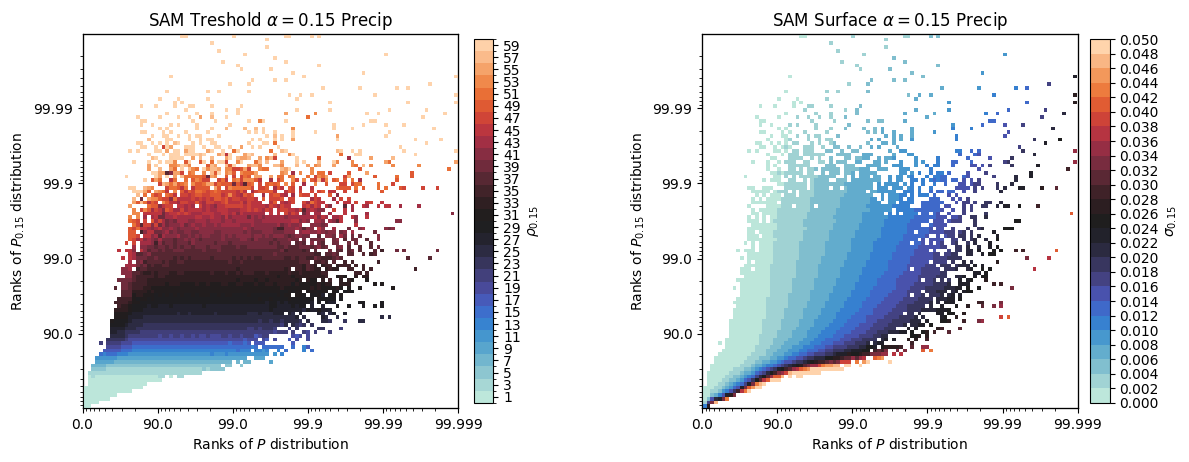

In [7]:
fig, axs  = plt.subplots(1, 2, figsize = (2.4*5.35, 4.85))
plt.subplots_adjust(wspace=0.65, hspace=0.52)

model_name = str(jd.settings["MODEL"][:-7])

cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 62, 1)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

ax=axs[0]

ax, cbar, ax_show = jd.plot_var_id_func_over_jdist('Prec', func = 'threshold_cond_alpha_85', title= model_name + r" Treshold $\alpha = 0.15$ Precip", mask = None, cmap = cmap, norm = norm, fig = fig, ax = ax)
cbar.remove()

# ax.set_title(r"$\rho_{0.5} $ for joint bins of $(P; P_{0.5})$")
ax.set_xlabel(r"Ranks of $P$ distribution")
ax.set_ylabel(r"Ranks of $P_{0.15}$ distribution")


cax = fig.add_axes([0.43, 0.12, 0.015, 0.75])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=values, spacing='proportional')

cbar.set_label(r'$\rho_{0.15} $')


cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 0.05+0.001, 0.001)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]

norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

ax = axs[1]
ax, cbar, ax_show = jd.plot_var_id_func_over_jdist('Prec', func = 'Sigma_cond_alpha_85', title=model_name +  r" Surface $\alpha= 0.15$ Precip", mask = None, cmap = cmap, norm = norm, fig = fig, ax = ax)
cbar.remove()

# ax.set_title(r"$\sigma_{0.5} $ for joint bins of $(P; P_{0.5})$")
ax.set_xlabel(r"Ranks of $P$ distribution")
ax.set_ylabel(r"Ranks of $P_{0.15}$ distribution")


cax = fig.add_axes([0.91, 0.12, 0.015, 0.75])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=boundaries, spacing='proportional')

cbar.set_label(r'$\sigma_{0.15}$')
# plt.tight_layout()
plt.savefig('discrete_surface_ratio_on_joint_dist.png', bbox_inches='tight')


## Multi model

In [2]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
settings_paths = [#"settings/arpege_summer_30d.yaml", "settings/fv3_summer_30d.yaml" , "settings/ifs_summer_30d.yaml" , "settings/mpas_summer_30d.yaml", 
                   # "settings/nicam_summer_30d.yaml", q
                    "settings/obs_summer_30d.yaml",
                   "settings/arpege_summer_30d.yaml", "settings/mpas_summer_30d.yaml", 
                   "settings/sam_summer_30d.yaml", 
                # "settings/um_summer_30d.yaml"
                ]


hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd=20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

Data loaded from /homedata/mcarenso/tempest/OBS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/ARPEGE_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/MPAS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/SAM_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/ARPEGE_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/MPAS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/SAM_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/scratchx/mcarenso/ipykernel_3707139/521812994.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratchx/mcarenso/ipykernel_3707139/521812994.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratchx/mcarenso/ipykernel_3707139/521812994.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratchx/mcarenso/ipykernel_3707139/521812994.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


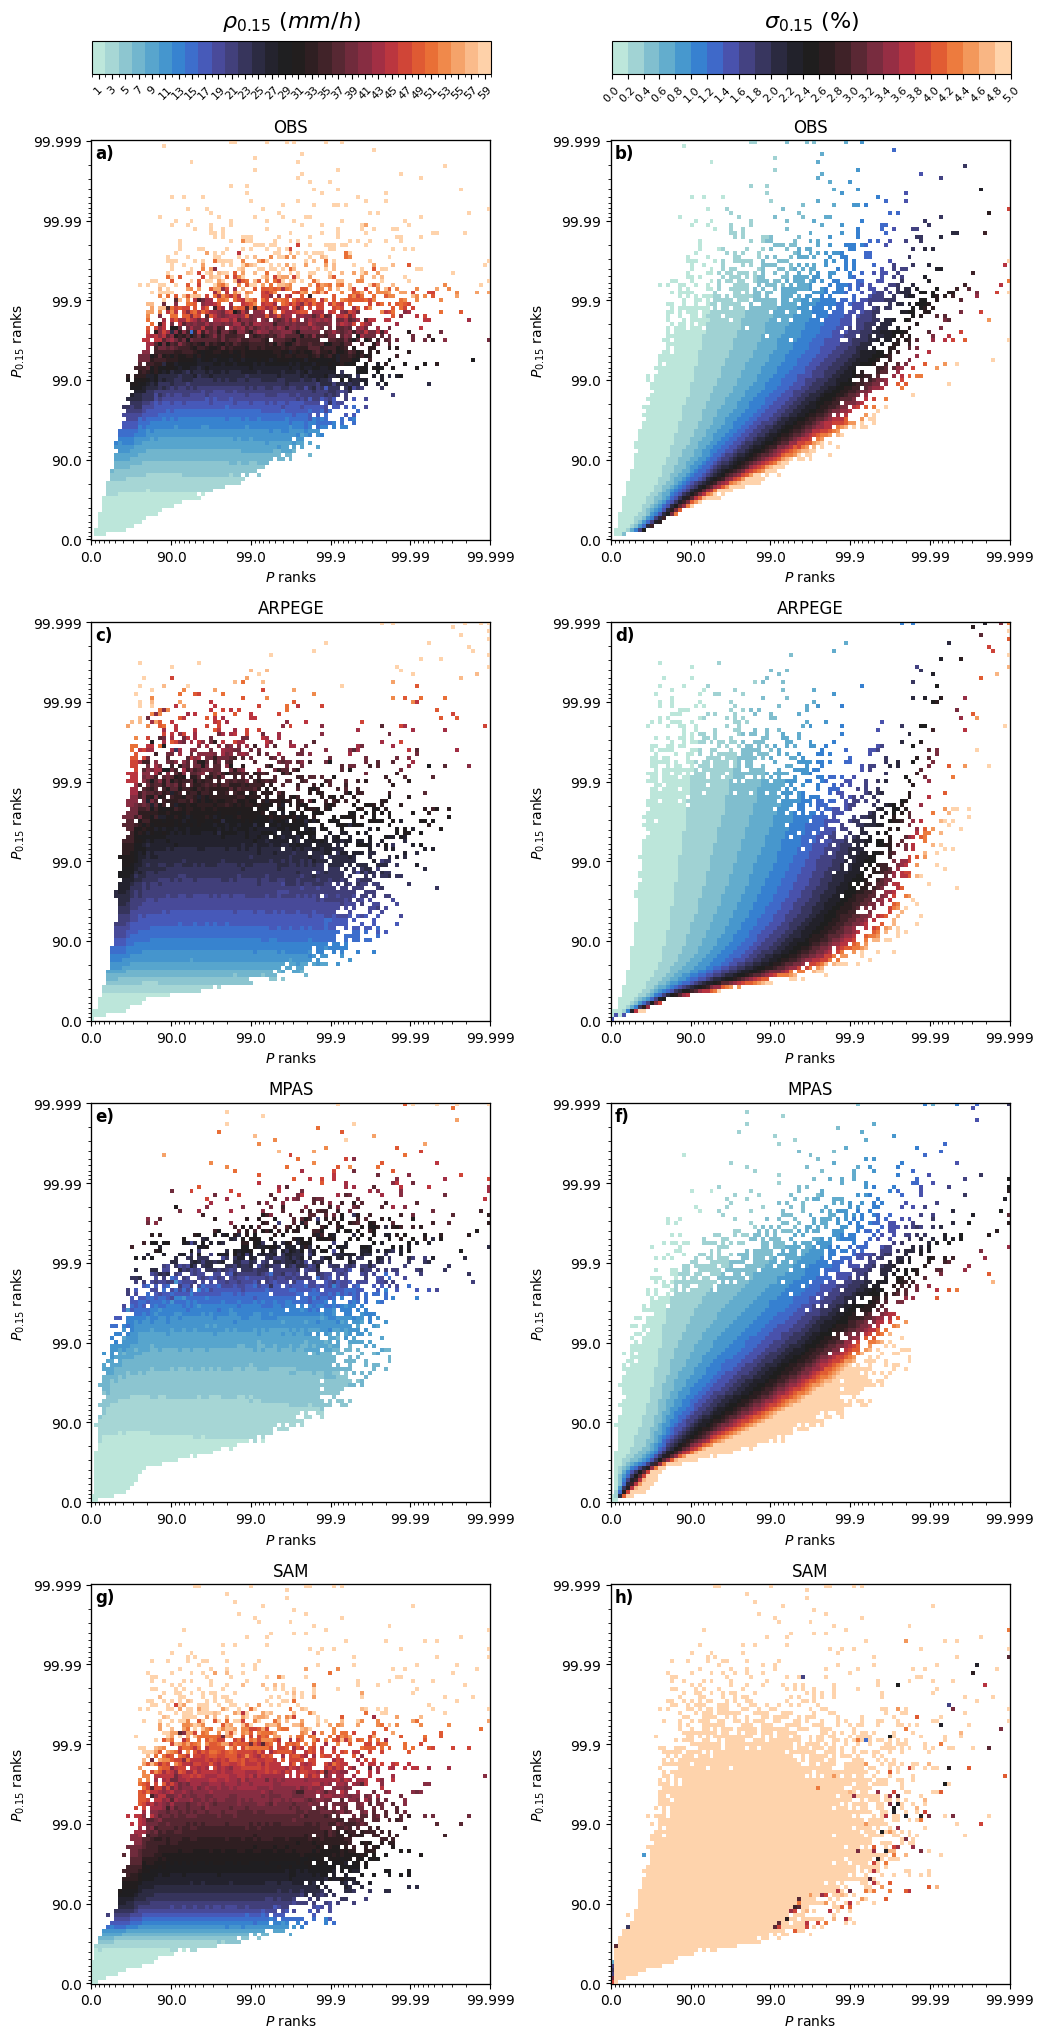

In [8]:
fig, axs  = plt.subplots(len(jds), 2, figsize = (1.97*5.35, 4.85 * len(jds)))

cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 61, 1)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

width = 0.379
bottom = 1.015
height = 0.017
cax = fig.add_axes([0.092, bottom, width, height])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation = "horizontal", ticks=values, spacing='proportional')

cbar.set_label(r'$\rho_{0.15}$ $(mm/h)$', labelpad=10, fontsize=16)
cbar.ax.xaxis.set_label_position('top')
for tick in cbar.ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(8)
    tick.set_horizontalalignment('center')

cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 0.05+0.001, 0.001)
values = values_and_boundaries[1::2]
boundaries  = 100*values_and_boundaries[::2]

norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

cax = fig.add_axes([0.585, bottom, width, height])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation = "horizontal", ticks=boundaries, spacing='proportional')

cbar.set_label(r'$\sigma_{0.15}$ $(\%)$', labelpad=10, fontsize=16)
cbar.ax.xaxis.set_label_position('top')
for tick in cbar.ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(8)
    tick.set_horizontalalignment('center')

letters = [["c)", "d)"], ["c)", "d)"], ["e)", "f)"], ["g)", "h)"]]

for jd, axe, ltrs in zip(jds, axs, letters): 
    model_name = str(jd.settings["MODEL"][:-7])
 
    cmap = sns.color_palette("icefire", as_cmap=True)
    values_and_boundaries = np.arange(0, 61, 1)
    values = values_and_boundaries[1::2]
    boundaries  = values_and_boundaries[::2]
    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)
    
    ax=axe[0]
    letter = ltrs[0]
    ax, cbar, ax_show = jd.plot_var_id_func_over_jdist('Prec', func = 'threshold_cond_alpha_85', title= model_name, mask = None, cmap = cmap, norm = norm, fig = fig, ax = ax) # + r" $\rho_{0.15}$"
    cbar.remove()
    ax.text(0.01, 0.99, letter, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

    # ax.set_title(r"$\rho_{0.5} $ for joint bins of $(P; P_{0.5})$")
    ax.set_xlabel(r"$P$ ranks")
    ax.set_ylabel(r"$P_{0.15}$ ranks")

    cmap = sns.color_palette("icefire", as_cmap=True)
    values_and_boundaries = np.arange(0, 0.05+0.001, 0.001)
    values = values_and_boundaries[1::2]
    boundaries  = values_and_boundaries[::2]

    norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

    ax = axe[1]
    letter = ltrs[1]
    ax, cbar, ax_show = jd.plot_var_id_func_over_jdist('Prec', func = 'Sigma_cond_alpha_85', title=model_name , mask = None, cmap = cmap, norm = norm, fig = fig, ax = ax) #+  r" $\sigma_{0.15}$"
    cbar.remove()
    ax.text(0.01, 0.99, letter, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
    # ax.set_title(r"$\sigma_{0.5} $ for joint bins of $(P; P_{0.5})$")
    ax.set_xlabel(r"$P$ ranks")
    ax.set_ylabel(r"$P_{0.15}$ ranks")

    plt.tight_layout()


In [3]:
for ax in axs :
    print(ax[0])
    break

NameError: name 'axs' is not defined

In [4]:
def compute_conditional_data_over_density(self, data = None, mask = None, plot_func = np.nanmean):         
    var_days = list(data.days.values)  
    prec_days = list(self.prec.days.values)  
    days_filter = np.array([prec_day in var_days for prec_day in prec_days])

    n_i, n_j = self.bincount.shape
    data_over_density = np.full(shape=(n_i,n_j), fill_value=np.nan)

    for d2 in range(n_j): 
        for d1 in range(n_i):
            data_where_joint_bin = self.get_mask_yxt(d1, d2, var_days=var_days)
            if mask is not None : 
                data_where_joint_bin = np.logical_and(data_where_joint_bin, mask[:,:,days_filter])
            else : 
                data_where_joint_bin = data_where_joint_bin[:,:,days_filter]

            if np.any(data_where_joint_bin==True):
                to_mean = data.where(data_where_joint_bin)
                if not np.all(np.isnan(to_mean)):
                    data_over_density[d1, d2] = plot_func(to_mean)
                    
    return data_over_density

In [8]:
for jd in jds : 
    print("a")
    arr = jd.prec.threshold_cond_alpha_85_Prec < 10       
    inf10_jdensity = compute_conditional_data_over_density(jd, arr, plot_func = np.sum)
    print(np.nansum(inf10_jdensity[jd.dist1.ranks>90,:])/np.nansum(jd.bincount[jd.dist1.ranks>90,:]))

a
0.5540741224276645
a
0.17344191132072392
a
0.9332212738874293
a
0.0326549929010885


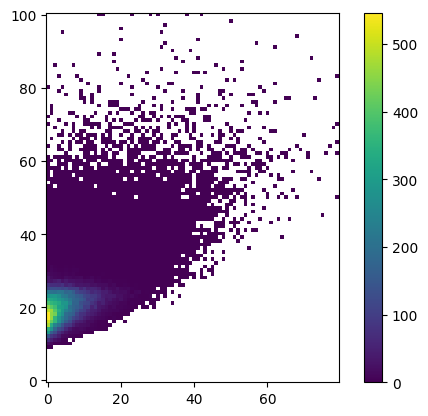

In [35]:
plt.imshow(inf10_jdensity[jd.dist1.ranks>90,:].T, origin = 'lower')
plt.colorbar()

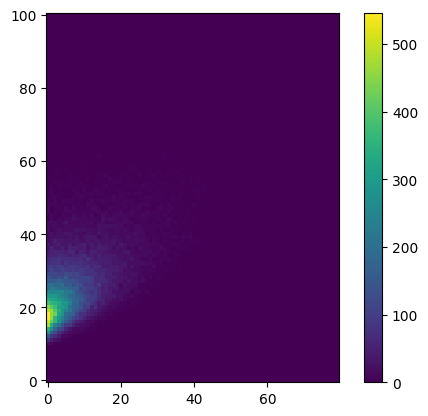

In [37]:
plt.imshow(jd.bincount[jd.dist1.ranks>90,:].T, origin = 'lower')
plt.colorbar()

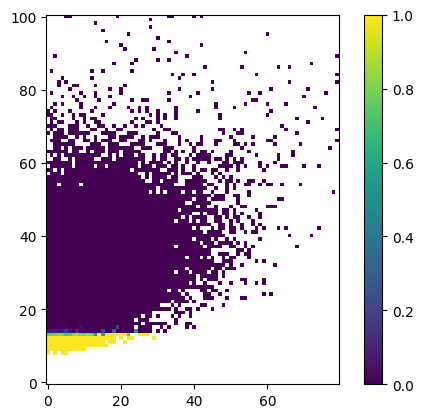

In [48]:
plt.imshow((inf10_jdensity[jd.dist1.ranks>90,:]/jd.bincount[jd.dist1.ranks>90,:]).T, origin = 'lower')
plt.colorbar()

In [25]:
# %matplotlib inline
# from skimage import measure # pylance: disable=import-error 
# from tempest.plots.plot2d import set_frame_invlog, show_joint_histogram

# fig, axs = plt.subplots(2, 2, figsize=(1.261*9.6, 9.7))
# levels = [0, 25]

# jd.plot_data_contour(data = jd.bincount, contour=jd.bincount, contour_2=jd_obs.bincount, levels = levels, scale = 'log', label  = 'Bincount', title = 'SAM vs Obs',
#                   cmap=plt.cm.magma_r, fig = fig, ax = axs[0,0], cb_bool =True)
# axs[0,0].set_xlabel(r"1$^\circ\times 1$day")
# axs[0,0].set_ylabel(r"km-scale")

# model_name = str(jd.settings["MODEL"][:-7])

# jd.plot(mask = False, branch=[True, False] , fig = fig, ax = axs[0, 1], N_branch=60, title = model_name+" normalized density", offset_low = 1, offset_up=1)
# axs[0,1].set_xlabel(r"1$^\circ\times 1$day")
# axs[0,1].set_ylabel(r"km-scale")
# jd.plot(mask = True, branch=[True, True], fig = fig, ax = axs[1, 0], N_branch = 60, title = "Categories", offset_low = 1, offset_up=1) 
# axs[1,0].set_xlabel(r"1$^\circ\times 1$day")
# axs[1,0].set_ylabel(r"km-scale")


# models = ["ARPEGE", "FV3", "IFS", "MPAS", "NICAM", "Obs", "SAM", "UM"]
# opt_alpha = [0.5, 0.1, 0.25, 0.01, 0.5, 0.5, 0.33, 0.15]
# opt_conv = [0.1, 0.01, 0.15, 0.01, 0.33, 0.01, 0.2, 0.1]
# y_pos = np.arange(len(models))
# # Create horizontal bars
# # bars = ax.barh(y_pos, opt_alpha, xerr=np.array(ci).T, color='skyblue', ecolor='black', capsize=5)
# axs[1,1].scatter(opt_alpha, y_pos, color = 'blue', label=r"argmin $\alpha$ with $1° \times 1day$")
# axs[1,1].scatter(opt_conv, y_pos, color = 'red', label=r"argmax $\alpha$ with $P_{10mm/h}$")

# for i in range(len(models)):
#     axs[1,1].plot([opt_alpha[i], opt_conv[i]], [y_pos[i], y_pos[i]], color='grey')


# # Label the y-axis with the model names
# axs[1,1].set_yticks(y_pos)
# axs[1,1].set_yticklabels(models)
# axs[1,1].invert_yaxis()  # labels read top-to-bottom

# # Label the x-axis
# axs[1,1].legend()
# axs[1,1].set_title(r"$I_{99th}$ optimal $\alpha$ value ranges")

# plt.tight_layout()